In [1]:
using SymPy, Plots

In [2]:
# define symbolic variables x, nu, t
@vars x ν t
phi = exp(-(x - 4 * t)^2 / (4 * ν * (t + 1))) + exp(-(x - 4 * t - 2 * sympy.pi)^2 / (4 * ν * (t + 1)))

                  2                2 
 -(-4⋅t + x - 2⋅π)      -(-4⋅t + x)  
 ───────────────────    ─────────────
     4⋅ν⋅(t + 1)         4⋅ν⋅(t + 1) 
ℯ                    + ℯ             

In [3]:
phiprime = diff(phi, x)

                           2                                         2 
                -(-4⋅t + x)                         -(-4⋅t + x - 2⋅π)  
                ─────────────                       ───────────────────
                 4⋅ν⋅(t + 1)                            4⋅ν⋅(t + 1)    
  (-8⋅t + 2⋅x)⋅ℯ                (-8⋅t + 2⋅x - 4⋅π)⋅ℯ                   
- ─────────────────────────── - ───────────────────────────────────────
          4⋅ν⋅(t + 1)                         4⋅ν⋅(t + 1)              

In [4]:
u = -2 * ν * (phiprime / phi) + 4

      ⎛                           2                                         2 
      ⎜                -(-4⋅t + x)                         -(-4⋅t + x - 2⋅π)  
      ⎜                ─────────────                       ───────────────────
      ⎜                 4⋅ν⋅(t + 1)                            4⋅ν⋅(t + 1)    
      ⎜  (-8⋅t + 2⋅x)⋅ℯ                (-8⋅t + 2⋅x - 4⋅π)⋅ℯ                   
  2⋅ν⋅⎜- ─────────────────────────── - ───────────────────────────────────────
      ⎝          4⋅ν⋅(t + 1)                         4⋅ν⋅(t + 1)              
- ────────────────────────────────────────────────────────────────────────────
                                        2                2                    
                       -(-4⋅t + x - 2⋅π)      -(-4⋅t + x)                     
                       ───────────────────    ─────────────                   
                           4⋅ν⋅(t + 1)         4⋅ν⋅(t + 1)                    
                      ℯ                    + ℯ      

In [5]:
ufunc = lambdify(u)

#116 (generic function with 1 method)

In [6]:
ufunc(1, 4, 3)

3.49170664206445

In [7]:
nx = 101
nt = 100
dx = 2 * π / (nx - 1)
nu = .07
dt = dx * nu

x = LinRange(0, 2*π, nx)
un = ones(nx)
t = 0

u = [ufunc(t, x0, nu) for x0 in x];

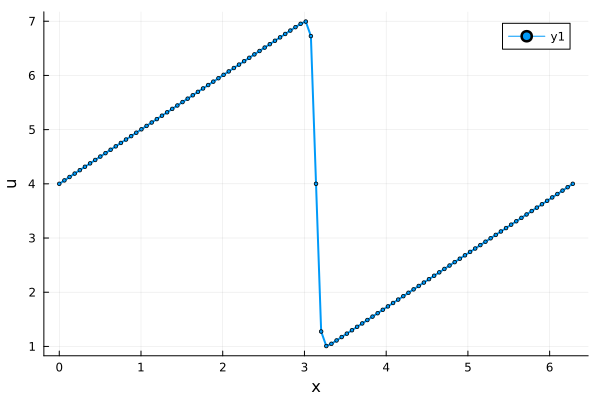

In [8]:
plot(x, u, xlabel="x", ylabel="u", marker=:circle, markersize=2, linewidth=2, dpi=100)

In [14]:
un = ones(nx, nt)
# copy the u values into the 1st row of un
un[:, 1] = u

# calculate the next rows of un using the previous rows by burgers equation
for n in 1:nt-1, i in 2:nx-1
    un[i, n+1] = un[i, n] - un[i, n] * dt / dx * (un[i, n] - un[i-1, n]) + nu * dt / dx^2 *
                                                                           (un[i+1, n] - 2 * un[i, n] + un[i-1, n])
    # set the boundary conditions
    un[1, n+1] = un[1, n] - un[1,n] * dt / dx * (un[1, n] - un[end-2, n]) + nu * dt / dx^2 * (un[2, n] - 2 * un[1, n] + un[end-2, n])
    un[end, n+1] = un[1, n+1]
end

┌ Info: Saved animation to /home/fuad/MyCodes/Julia/CFDJulia/tmp.gif
└ @ Plots /home/fuad/.julia/packages/Plots/wutJB/src/animation.jl:149


Plots.AnimatedGif("/home/fuad/MyCodes/Julia/CFDJulia/tmp.gif")
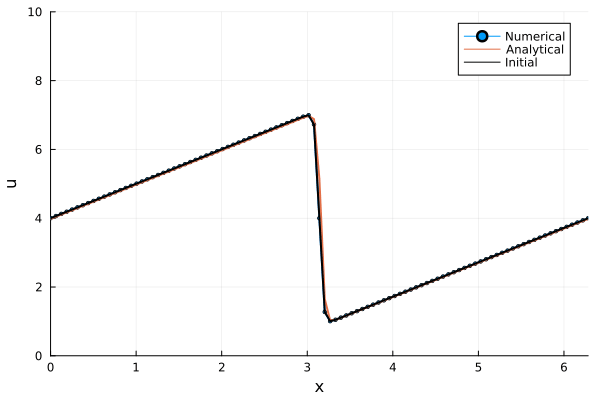

In [23]:
@gif for n in 1:nt
    plot(x, un[:, n], label="Numerical", xlabel="x", ylabel="u", marker=:circle, markersize=2, linewidth=2, dpi=100, xlim=(0, 2*π), ylim=(0, 10))
    plot!(x, [ufunc(dt*n, xi, nu) for xi in x], label="Analytical", linewidth=2)
    plot!(x, u, linewidth=2, color=:black, label="Initial")
end